In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_table('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/fruit_data_with_colors.txt')

In [3]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.3+ KB


In [5]:
data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


# 1. EDA

In [6]:
data['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

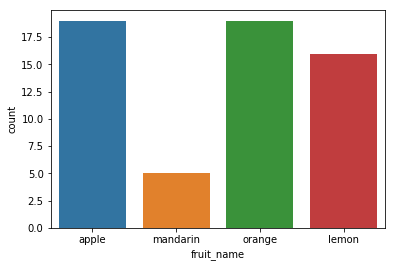

In [7]:
sns.countplot(x=data['fruit_name'])

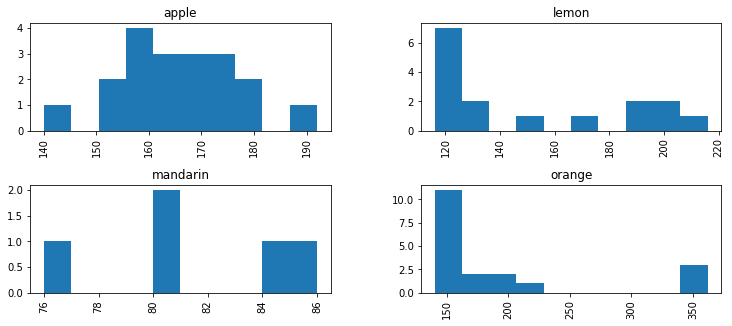

In [8]:
data.hist(column='mass', by='fruit_name',figsize=(12,5))
plt.show()

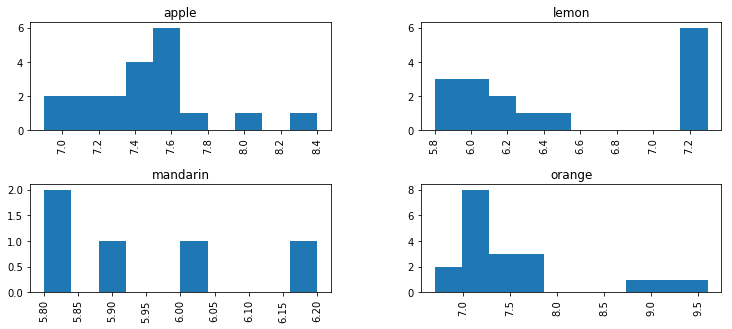

In [9]:
data.hist(column='width', by='fruit_name',figsize=(12,5))
plt.show()

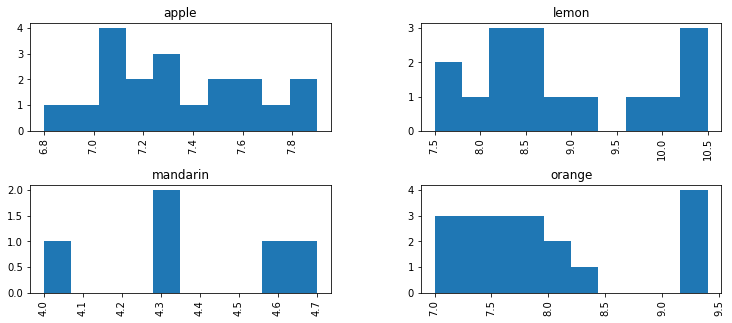

In [10]:
data.hist(column='height', by='fruit_name',figsize=(12,5))
plt.show()

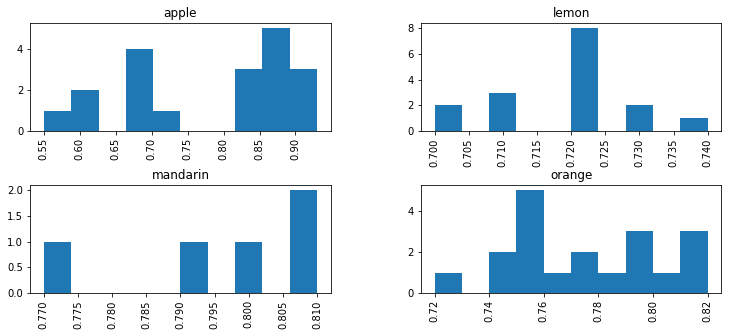

In [11]:
data.hist(column='color_score', by='fruit_name',figsize=(12,5))
plt.show()

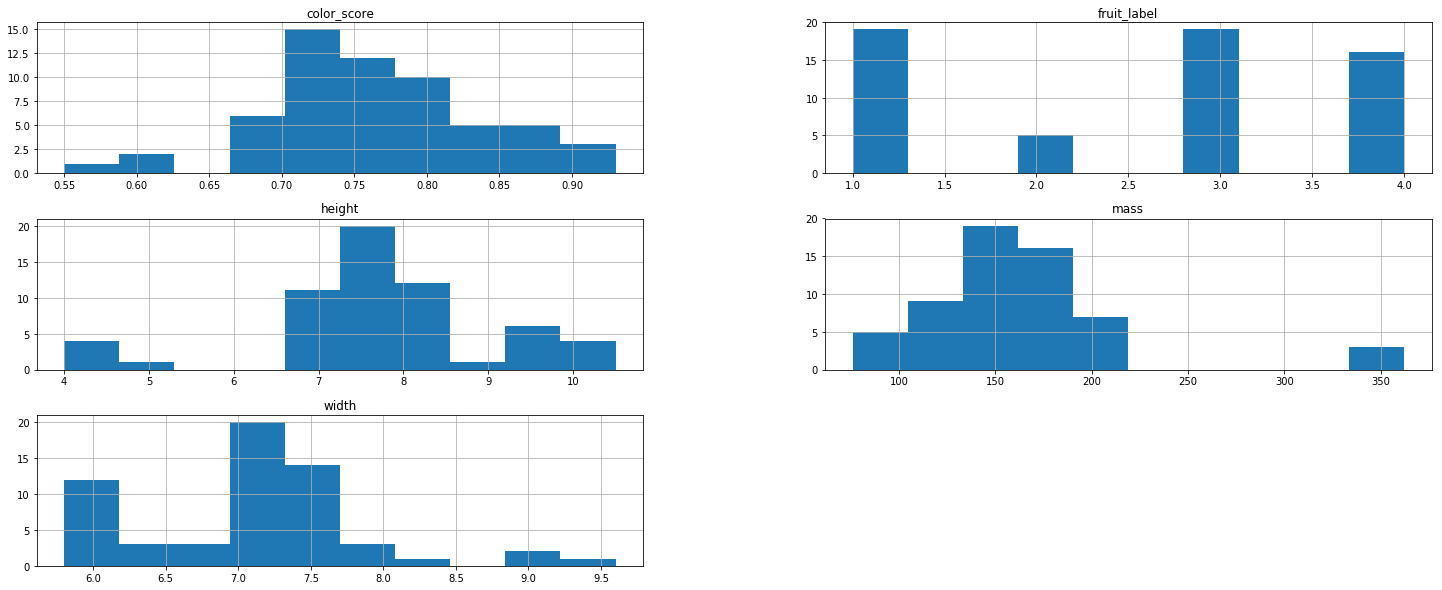

In [12]:
data.hist(figsize=(25,10))
plt.show()

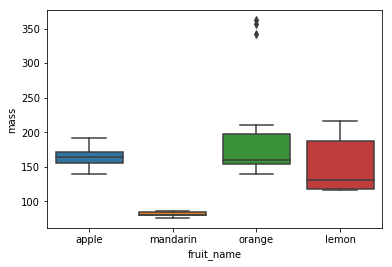

In [13]:
sns.boxplot(x='fruit_name',y='mass',data=data)

In [14]:
data.groupby('fruit_name').mean()

,fruit_label,mass,width,height,color_score
fruit_name,,,,,
apple,1.0,165.052632,7.457895,7.342105,0.783684
lemon,4.0,150.000000,6.512500,8.856250,0.718125
mandarin,2.0,81.200000,5.940000,4.380000,0.796000
orange,3.0,193.789474,7.557895,7.936842,0.771053


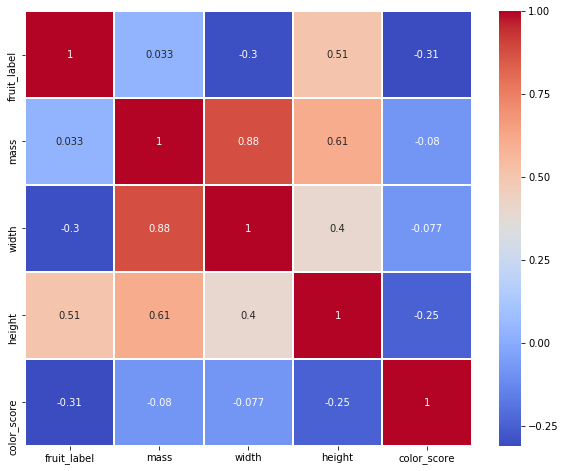

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True, linecolor='white',linewidths=1)

# 2. Data Preprocessing

In [16]:
x = data.drop(['fruit_label','fruit_name','fruit_subtype'],axis=1)

y = data['fruit_label']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# due to imbalance of data, stratify  is used
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=101)

# 3. Build Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [20]:
models = []

models.append(('LogReg', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier(random_state=101)))
models.append(('RFC', RandomForestClassifier(random_state=101)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))

In [21]:
# StratifiedKFold use for classification, KFold use for regression
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [22]:
# using k-fold of 10 for cross validation
results = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=3,random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=skfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LogReg: 0.7542483660130719 (0.15898348544324992)
DTC: 0.8718954248366013 (0.054933075527975654)
RFC: 0.9581699346405229 (0.029751128566643244)
KNN: 0.615686274509804 (0.058779940276907486)
NB: 0.8104575163398694 (0.04227702386613396)
SVM: 0.6627450980392157 (0.059300895279549015)


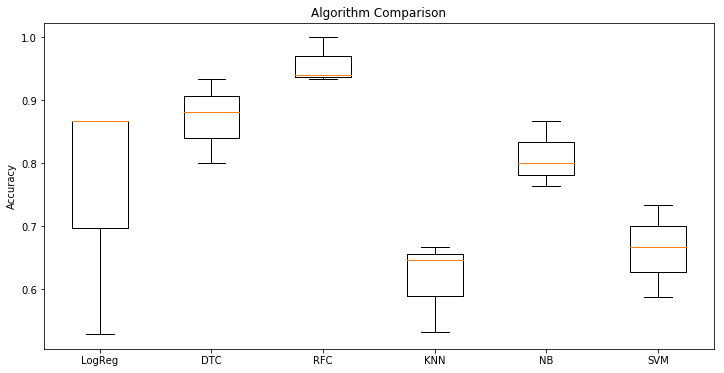

In [23]:
plt.figure(figsize=(12,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

Random Forest shown to be the better choice due to having a hight mean accuracy and a low variance.

# 4. Evaluation & Validation
Since both model chosen are tree based models, we conduct feature selection by looking at the features which are important.

In [24]:
rfc = RandomForestClassifier(random_state=101).fit(X_train, y_train)

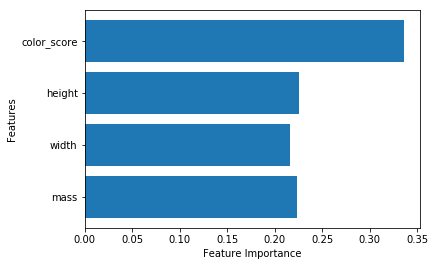

In [25]:
# visualize the feature importance of each feature
plt.barh(range(x.shape[1]), rfc.feature_importances_, align='center')

plt.yticks(np.arange(x.shape[1]), ('mass', 'width', 'height', 'color_score') )
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

#### Parameter tuning using GridsearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# find max_features sqrt(4) is 2
param_grid = {'max_features': [n for n in range(1,5)]}

In [28]:
skfold = StratifiedKFold(n_splits=3,random_state=101, shuffle=True)

In [29]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=101), param_grid=param_grid, cv=skfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=101, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [30]:
grid_search.best_params_

{'max_features': 2}

In [31]:
grid_search.best_score_

0.9574468085106383

In [32]:
# max_features = 2 is chosen
rfc = RandomForestClassifier(max_features=2, random_state=101)

rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

print(f'Training score: {rfc.score(X_train, y_train)}')
print(f'Test score: {rfc.score(X_test, y_test)}')

Training score: 1.0
Test score: 0.8333333333333334


In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 2 2]
 [0 0 0 3]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         1
          3       1.00      0.50      0.67         4
          4       0.60      1.00      0.75         3

avg / total       0.90      0.83      0.83        12



# 5. Build Model with Scaled Data

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
# scaled the data
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [38]:
results = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=3,random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=skfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LogReg: 0.596078 (0.109007)
DTC: 0.871895 (0.054933)
RFC: 0.958170 (0.029751)
KNN: 0.935948 (0.003697)
NB: 0.810458 (0.042277)
SVM: 0.342484 (0.088523)


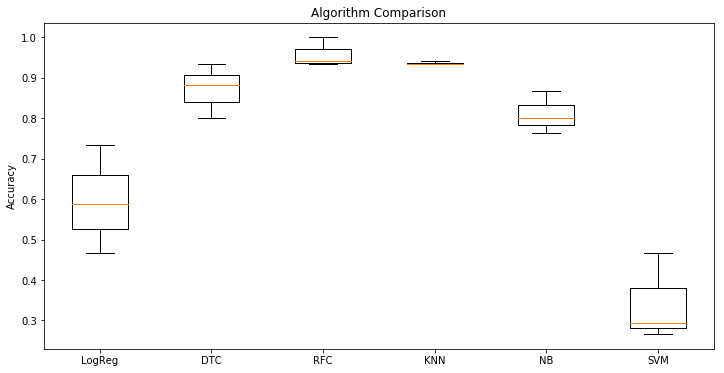

In [39]:
plt.figure(figsize=(12,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

RFC remains the same because scaling has no effect on it while KNN improves a lot because KNN models need scaling.

Let's compare with KNN.

# 6. Evaluation & Validation

In [40]:
param_grid = {'n_neighbors': [n for n in range(1,21)]}

In [41]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=skfold)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=101, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
result = pd.DataFrame(grid_search.cv_results_)

display(result.T)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\de

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
mean_fit_time,0,0.00520293,0,0.0052398,0.00521175,0,0.00522526,0.00522137,0,0,0.0104027,0.00217001,0.00522566,0.00520992,0,0.0104463,0,0,0.00522463,0
std_fit_time,0,0.00735805,0,0.0074102,0.00737053,0,0.00738964,0.00738413,0,0,0.00735593,0.00306885,0.0073902,0.00736794,0,0.00738672,0,0,0.00738874,0
mean_score_time,0,0,0.0103994,0.00519427,0.00521366,0.00519196,0,0.00520658,0.00216977,0,0.00520674,0,0.00519673,0,0.0126193,0,0.00521477,0.00520817,0,0.00521358
std_score_time,0,0,0.00735352,0.0073458,0.00737323,0.00734254,0,0.00736322,0.00306852,0,0.00736345,0,0.00734929,0,0.0178463,0,0.0073748,0.00736547,0,0.00737311
param_n_neighbors,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
params,{'n_neighbors': 1},{'n_neighbors': 2},{'n_neighbors': 3},{'n_neighbors': 4},{'n_neighbors': 5},{'n_neighbors': 6},{'n_neighbors': 7},{'n_neighbors': 8},{'n_neighbors': 9},{'n_neighbors': 10},{'n_neighbors': 11},{'n_neighbors': 12},{'n_neighbors': 13},{'n_neighbors': 14},{'n_neighbors': 15},{'n_neighbors': 16},{'n_neighbors': 17},{'n_neighbors': 18},{'n_neighbors': 19},{'n_neighbors': 20}
split0_test_score,0.941176,0.823529,0.941176,0.941176,0.823529,0.882353,0.941176,0.647059,0.588235,0.470588,0.294118,0.411765,0.352941,0.235294,0.235294,0.294118,0.294118,0.294118,0.294118,0.235294
split1_test_score,0.933333,1,0.866667,1,0.866667,0.866667,0.733333,0.733333,0.666667,0.6,0.6,0.533333,0.4,0.4,0.466667,0.4,0.533333,0.4,0.4,0.466667
split2_test_score,0.933333,0.866667,1,0.933333,0.866667,0.866667,0.733333,0.666667,0.6,0.466667,0.466667,0.466667,0.333333,0.333333,0.2,0.2,0.133333,0.133333,0.266667,0.266667
mean_test_score,0.93617,0.893617,0.93617,0.957447,0.851064,0.87234,0.808511,0.680851,0.617021,0.510638,0.446809,0.468085,0.361702,0.319149,0.297872,0.297872,0.319149,0.276596,0.319149,0.319149


In [43]:
grid_search.best_params_

{'n_neighbors': 4}

Using grid search, the best choice is when k = 4 with k = 1 and 3 coming at second.

In [44]:
grid_search.best_score_

0.9574468085106383

In [45]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train_scaled, y_train)

pred = knn.predict(X_test_scaled)

print(f'Training score: {knn.score(X_train_scaled, y_train)}')
print(f'Test score: {knn.score(X_test_scaled, y_test)}')

Training score: 0.9787234042553191
Test score: 0.9166666666666666


In [46]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[4 0 0 0]
 [0 1 0 0]
 [1 0 3 0]
 [0 0 0 3]]
             precision    recall  f1-score   support

          1       0.80      1.00      0.89         4
          2       1.00      1.00      1.00         1
          3       1.00      0.75      0.86         4
          4       1.00      1.00      1.00         3

avg / total       0.93      0.92      0.92        12



After scaling, KNN performs much better than RFC.

By building a pipeline, data leakage can be prevented during cross-validation stage.

# 7. Pipeline
### Gridsearching which model to use

In [47]:
from sklearn.pipeline import Pipeline

In [48]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('classifier', KNeighborsClassifier())])

In [49]:
param_grid = [{'classifier': [KNeighborsClassifier()], 
               'preprocessing': [MinMaxScaler()],
               'classifier__n_neighbors': [n for n in range(1,21)]},
              {'classifier': [RandomForestClassifier(random_state=101)], 
               'preprocessing': [None],
               'classifier__max_features': [n for n in range(1,5)]}]

In [50]:
grid = GridSearchCV(pipe, param_grid, cv=skfold)

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=101, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preprocessing', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'classifier': [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')], 'preprocessing': [MinMaxScaler(copy=True, feature_range=(0, 1))], 'classifier__n_neighbors': [1, 2, 3, 4, ..., verbose=0, warm_start=False)], 'preprocessing': [None], 'classifier__max_features': [1, 2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
grid.best_score_

0.9574468085106383

In [52]:
grid.score(X_test, y_test)

0.9166666666666666

In [53]:
pred = grid.predict(X_test)

In [54]:
# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[4 0 0 0]
 [0 1 0 0]
 [1 0 3 0]
 [0 0 0 3]]
             precision    recall  f1-score   support

          1       0.80      1.00      0.89         4
          2       1.00      1.00      1.00         1
          3       1.00      0.75      0.86         4
          4       1.00      1.00      1.00         3

avg / total       0.93      0.92      0.92        12



In [55]:
grid.best_params_

{'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=1, p=2,
            weights='uniform'),
 'classifier__n_neighbors': 1,
 'preprocessing': MinMaxScaler(copy=True, feature_range=(0, 1))}

By using a pipeline to search which model and which parameters are the best, the best model will be KNN with k = 1 using MinMaxScaler.